# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


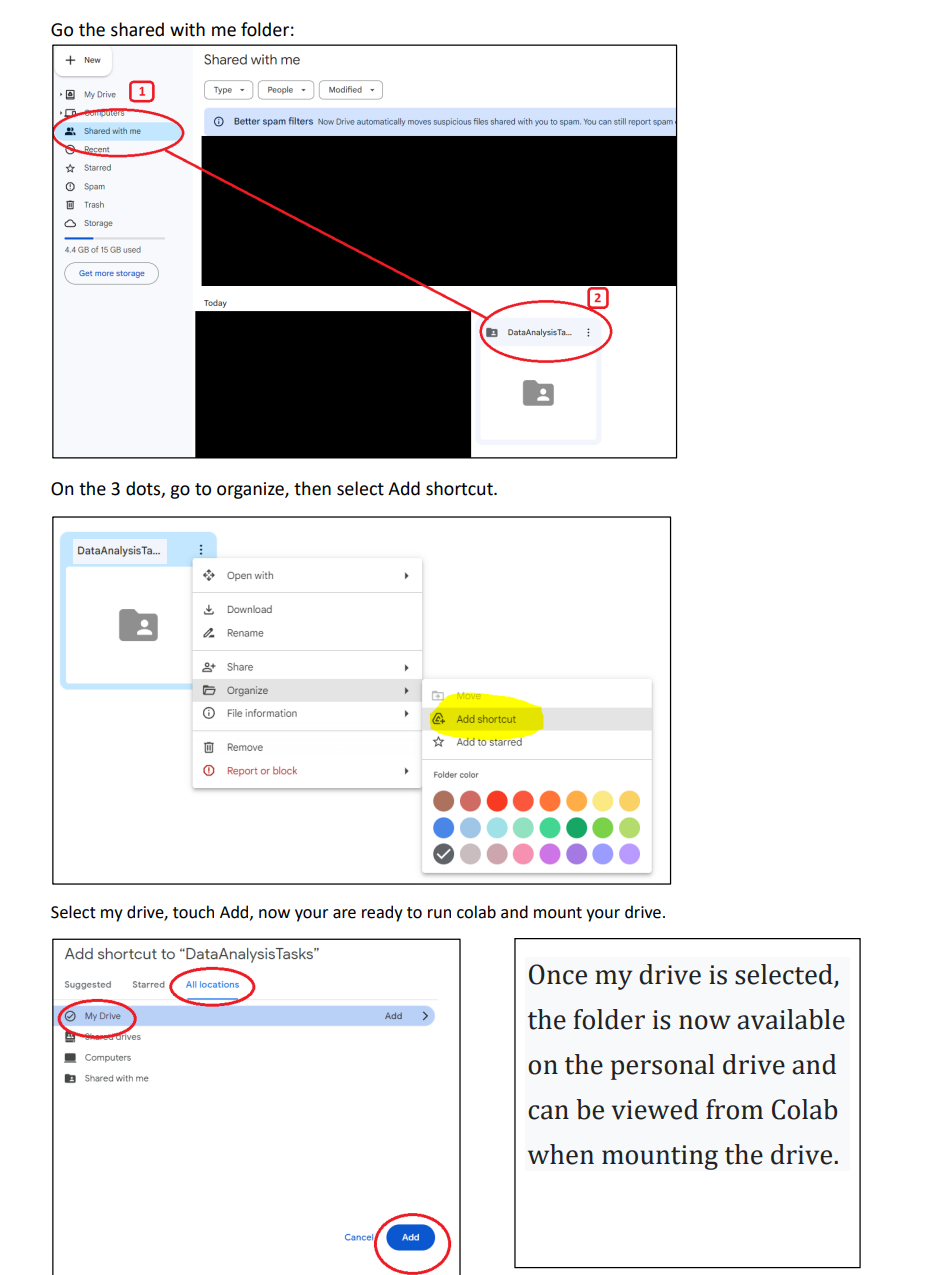

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/automobile.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


An error occurred while loading the CSV file: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/Automobile.csv', please check the correct mount of the shared folder


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








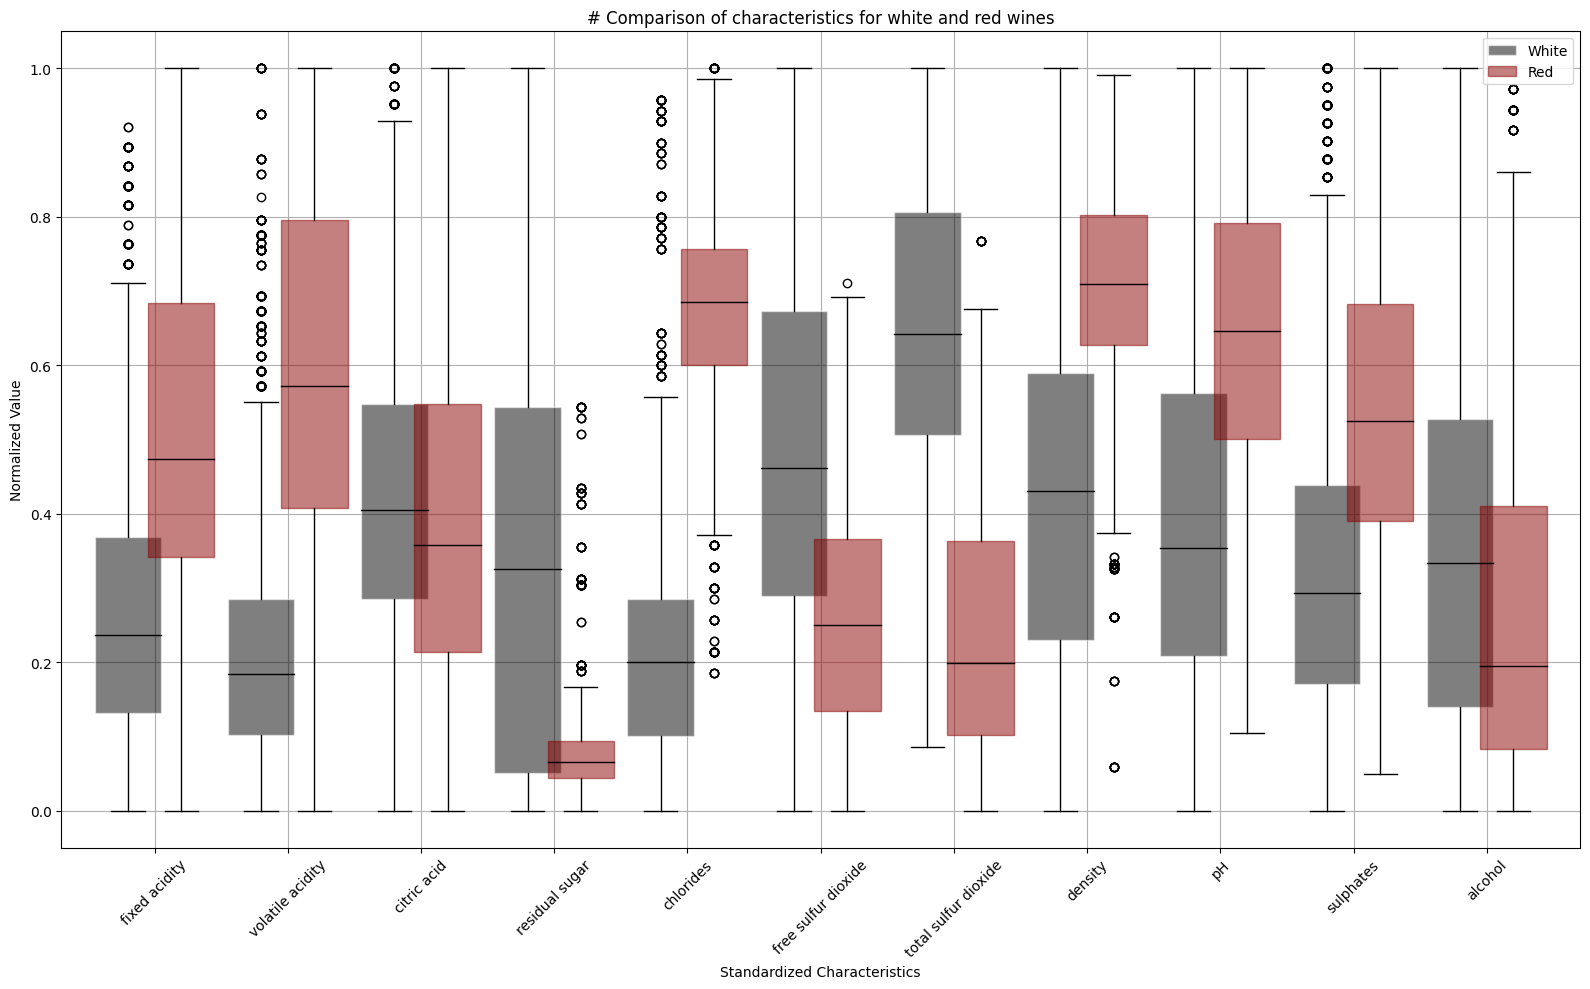

In [ ]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset path.
path = '/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/wine_quality.csv'

# Load the dataset.
df = pd.read_csv(path)

# Select the characteristics to compare.
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Function to eliminate outliers.
def filter_extreme_values(df, features, lower_percentile=0.1, upper_percentile=0.95):

    """
    Removes rows from the DataFrame that have values below the lower percentil
    or above the upper percentil.
    """

    # eliminate repeated characteristics
    indices_to_drop = set()

    for feature in features:
        lower_threshold = df[feature].quantile(lower_percentile)
        upper_threshold = df[feature].quantile(upper_percentile)

        # Obtain indexes of the rows with values outside the defined percentiles.
        outlier_indices = df[(df[feature] < lower_threshold) | (df[feature] > upper_threshold)].index
        indices_to_drop.update(outlier_indices)

    # Delete identified rows.
    filtered_df = df.drop(index=indices_to_drop)

    return filtered_df

# Apply the function to the DataFrame.
df = filter_extreme_values(df, features )

# Filter data by wine type.
white_wine = df[df['Type'] == 'White Wine']
red_wine = df[df['Type'] == 'Red Wine']

# Standardize the characteristics.
normalized_white_wine = (white_wine[features] - df[features].min()) / (df[features].max() - df[features].min())
normalized_red_wine = (red_wine[features] - df[features].min()) / (df[features].max() - df[features].min())

# Create the box plot.
plt.figure(figsize=(16, 10))
bp1 = plt.boxplot([normalized_white_wine[feature] for feature in features], positions=[i - 0.2 for i in range(1, len(features) + 1)], labels=None, patch_artist=True, boxprops=dict(facecolor='black', color='white', alpha=0.5), medianprops=dict(color='black'))
bp2 = plt.boxplot([normalized_red_wine[feature] for feature in features], positions=[i + 0.2 for i in range(1, len(features) + 1)], labels=None, patch_artist=True, boxprops=dict(facecolor='darkred', color='darkred', alpha=0.5), medianprops=dict(color='black'))

# Adjust the label positions.
positions = [i for i in range(1, len(features) + 1)]
plt.xticks(positions, features, rotation=45)

# Add labels.
plt.xlabel('Standardized Characteristics')
plt.ylabel('Normalized Value')

# Add title
plt.title('# Comparison of characteristics for white and red wines')

# Add legend.
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['White', 'Red'])

# Show plot.
plt.tight_layout()
plt.grid()
plt.show()